<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

## PDEs 03. The Continuity Equation

### About this notebook

In this notebook we present some of the techniques used to solve the linear advection equation.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 6 - 7 `

---

##  Discretization of a Smooth Function

Consider a smooth function $f(x)$ on a finite interval $[a,b]$. To represent numerically this function, we must divide the interval into a grid with $N-1$ equally spaced intervals or equivalently $N$ points. This is called *discretize* the function. 

There are many discretization methods (and there are also methods to represent continuous functions without a grid, using instead continuos basis functions such as sines or cosines. These are called *spectral methods*).

Some of the grid-based methods use *structured grids* and include

- Finite-differences
- Finite-volumes
- Finite-elements

All these structured grid methods use cartesian coordinates. *Unstructured grids* use other type of structures such as for example triangular cells or tetrahedra. Using these cells is possible to represent domains with irregular shapes but the treatment is more complicated.


<center>
<img src="https://i.ibb.co/PgDD2qK/Discretization.png" alt="drawing" width="600"/>
</center>

### Finite Differences Method

The first method that we considered was the Finite Differences, in which we will use a structured cartesian grid. The domain will be discretized into a grid with $N-1$ equally spaced intervals or equivalently $N$ points (nodes). The discrete data representing the function is evaluated at specific points. In the figure above, it can be seen that the points can be the nodes or the middle points at each interval.



These two grids are *equally spaced*, meaning that the space between any pair of consecutive points is the same.

---

### Finite-Volume Grids

In this discretization method, the domain is divided into intervals and the value of the function in each interval is given by its average.

\begin{equation}
\langle f_i \rangle = \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} f(x) dx
\end{equation}

In the plot above, the average values of the function is represented by the horizontal lines in each interval.

Using the expansion as a Taylor series,

\begin{equation}
f(x) = f(x_i) + f'(x_i) (x-x_i) + \frac{1}{2} f''(x_i) (x - x_i)^2 + ...
\end{equation}

we obtain, up to second order in $\Delta x$, the estimate

\begin{equation}
\langle f_i \rangle \sim f(x_i) + \mathcal{O} (\Delta x ^2).
\end{equation}

This equation indicates that the average over each zone can be approximated to the value of the function at the center of the interval.

---
###  Conservation Equation

The finite-volume grid is useful to describe conservation laws written as continuity equations,

\begin{equation}
\frac{\partial a}{\partial t} + \nabla \cdot F(a) = 0,
\end{equation}

where $a$ is the *vector* of conserved quantities and $F(a)$ is the flux of these quantities.

In one dimension, with $a=a(t,x)$, this equation simplifies to

\begin{equation}
\frac{\partial a}{\partial t} = - \frac{\partial F(a)}{\partial x} .
\end{equation}

Integrating this equation over a zone and normalizing by $\Delta x$ gives

\begin{align}
\frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \frac{\partial a}{\partial t} dx = &- \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}  \frac{\partial F(a)}{\partial x} dx \\
\frac{\partial }{\partial t} \left[ \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} a dx \right] = &- \frac{1}{\Delta x} \left[ \left. F(a)\right|_{x_{i+\frac{1}{2}}} - \left. F(a)\right|_{x_{i-\frac{1}{2}}} \right] \\
\frac{\partial \langle a_i \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ \left. F(a)\right|_{x_{i+\frac{1}{2}}} - \left. F(a)\right|_{x_{i-\frac{1}{2}}} \right]
\end{align}

In order to show one of the most important facts in the finite-volume method, consider the above equation for the next interval in the grid. This gives the relation

\begin{align}
\frac{\partial \langle a_{i+1} \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ \left. F(a)\right|_{x_{i+\frac{3}{2}}} - \left. F(a)\right|_{x_{i+\frac{1}{2}}} \right]
\end{align}

Note that the flux along the surface $x_{i+\frac{1}{2}}$ appears in the interval $i$ as well as in the interval $i+1$. When solving the equation in the complete interval, these shared fluxes through each boundary adds to one interval and substracts from its neighbor. Then, the quantity $a$ will be conserved exactly (up to round-off error).

---
## Solving the Advection Equation using a Finite-Volume Discretization

Considering a constant velocity $v$ in the advection equation, 

\begin{equation}
\partial_t a + v \partial_x a = 0\,\,,
\end{equation}

let us write this relation as a conservation equation,

\begin{equation}
\partial_t a + \partial_x F(a) = 0\,\,,
\end{equation}

where $F(a)= va$ is the flux of $a$. Considering a volume-element grid as described above, gives the relation

\begin{align}
\frac{\partial \langle a_i \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ F(a)_{i+\frac{1}{2}} -  F(a)_{i-\frac{1}{2}} \right]
\end{align}

In order to discretize the time derivative, we evaluate the r.h.s. at the midpoint in time to obtain a centered difference in time (and therefore a second-order accuarate estimate),

\begin{align}
\frac{a_i^{n+1} - a_i ^n }{\Delta t} = &- \frac{1}{\Delta x} \left[ F(a)_{i+\frac{1}{2}}^{n+\frac{1}{2}} -  F(a)_{i-\frac{1}{2}}^{n+\frac{1}{2}} \right],
\end{align}

from which we have

\begin{align}
a_i^{n+1} = & a_i ^n - \frac{\Delta t}{\Delta x} \left[ F(a)_{i+\frac{1}{2}}^{n+\frac{1}{2}} -  F(a)_{i-\frac{1}{2}}^{n+\frac{1}{2}} \right].
\end{align}


The evaluation of the fluxes at the half-time can be estimated evaluating the state at this time,

\begin{equation}
F(a)_{i+\frac{1}{2}}^{n+\frac{1}{2}} = F \left(a_{i+\frac{1}{2}}^{n+\frac{1}{2}} \right),
\end{equation}

and therefore

\begin{align}
a_i^{n+1} = & a_i ^n - \frac{\Delta t}{\Delta x} \left[ F\left(a_{i+\frac{1}{2}}^{n+\frac{1}{2}}\right) -  F\left(a_{i-\frac{1}{2}}^{n+\frac{1}{2}}\right) \right]
\end{align}

The state value will be approximated, up to secon order, by a Taylor expansion. However, at each interface, the expansion can be calculated from the left or from the right. The left approximation gives

\begin{align}
a _{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & a_i^n + \frac{\Delta x}{2} \left. \frac{\partial a}{\partial x} \right|_i + \frac{\Delta t}{2} \left. \frac{\partial a}{\partial t} \right|_i + ...\\
a _{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & a_i^n + \frac{\Delta x}{2} \left. \frac{\partial a}{\partial x} \right|_i + \frac{\Delta t}{2} \left( -v\left. \frac{\partial a}{\partial x} \right|_i \right) + ... \\
a _{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & a_i^n + \frac{\Delta x}{2} \left( 1 - v \frac{\Delta t}{\Delta x}\right) \left. \frac{\partial a}{\partial x} \right|_i  + ... 
\end{align}

Similarly, the right approximatin gives

\begin{align}
a _{i+\frac{1}{2} , R}^{n+\frac{1}{2}} = & a_{i+1}^n - \frac{\Delta x}{2} \left( 1 + v \frac{\Delta t}{\Delta x}\right) \left. \frac{\partial a}{\partial x} \right|_{i+1}  + ... 
\end{align}

The first derivative involved in these relations can be evaluated as
\begin{equation}
\left. \frac{\partial a}{\partial x} \right|_i = \frac{a_{i+1} - a_{i-1}}{2\Delta x} 
\end{equation}
or
\begin{equation}
\left. \frac{\partial a}{\partial x} \right|_{i+1} = \frac{a_{i+2} - a_{i}}{2\Delta x} .
\end{equation}

### The Riemann Problem

The two expansions given above estimates the value of the state from left or from right. These estimates are separated by an interface and choosing the right value for the state is known as the **Riemann problem**. This is expressed by the equation

\begin{equation}
a _{i+\frac{1}{2}}^{n+\frac{1}{2}} = \mathcal{R} \left( a _{i+\frac{1}{2} , L}^{n+\frac{1}{2}} , a _{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \right).
\end{equation}

For the advection problem, in which the differential equation propagates the state to the right (if $v>0$) or to the left (if $v<0$), the solution of the Riemann problem is simply

\begin{equation}
\mathcal{R} \left( a _{i+\frac{1}{2} , L}^{n+\frac{1}{2}} , a _{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \right) = 
\begin{cases}
a _{i+\frac{1}{2} , L}^{n+\frac{1}{2}}  \hspace{0.5cm} \text{ if } v>0 \text{ (upwind)} \\
a _{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \hspace{0.5cm} \text{ if } v<0 \text{ (downwind)}\\
\end{cases}
\end{equation}

### Boundary Conditions

Boundary conditions are implemented by introducing ghost cells at the extremes of the domain of integration. For example, periodic boundary conditions are implmented by 

\begin{align}
a_{max+1} = & a_{0}\\
a_{0-1} = & a_{max} .
\end{align}

Outflow conditions (zero-gradient) are implemented  by

\begin{align}
a_{max+1} = & a_{max}\\
a_{0-1} = & a_{0} .
\end{align}

---
### Algorithm to Solve the Advection Equation using the Finite-Volume Method

The problem flow (algorithm) to solve the advection equation includes the following steps

1. Set initial conditions
2. Get timestep $\Delta t$ (given $v$, $\Delta x$ and $C_{CFL}$ values)
3. Main evolution loop 
 * Fill boundary conditions
 * compute the interface states (left and right)
 * solve the Riemann proble at all interfaces
 * perform the conservation update to obtain $a^{n+1}$
 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline


# Definition of the initial Gaussian profile
def Psi(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))


# Definition of the Top Hat profile
def TopHat(x):
    profile = np.zeros(len(x))
    for i in range(len(x)):
        if i<len(x)/3:
            profile[i] = 0
        elif i>=len(x)/3 and i<2*len(x)/3:
            profile[i] = 1
        else:
            profile[i] = 0
    return profile



#First Derivative
def der(a):
    dadx = np.zeros(xlen)
    # Boundary points
    dadx[0] = (a[1] - a[0])/(2*dx)
    dadx[-1] = (a[-1] - a[-2])/(2*dx)
    
    for i in range(1,xlen-1):
        dadx[i] = (a[i+1] - a[i-1])/(2*dx)
    return dadx

# Flux Definition
def F(a):
    return v*a 

# Riemann Problem
def R(a,v):
    dadx = der(a)
    a_halftime = np.zeros(len(xgrid))
    if v>0:
        for i in range(len(xgrid)):
            a_halftime[i] = a[i] + (dx/2.)*(1-(dt/dx)*v)*dadx[i]
    else:
        for i in range[1,len(xgrid)-2]:
            a_halftime[i] = a[i+1] - (dx/2.)*(1+(dt/dx)*v)*dadx[i+1]
    return a_halftime
        

# Finite-Volume Method
def FV(a):
    anew = np.zeros(xlen) 
    Ra = R(a,v)
    Fa = F(Ra)
    for j in range(1,xlen):
        anew[j] = a[j] - (dt/dx)*(Fa[j] - Fa[j-1])
        
    # Outflow boundary conditions
    anew[0] = a[0] 
    return anew


# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.6

# Definition of the grids
x_i = 0.
x_f = 100.
xlen = 1000
xgrid = np.linspace(x_i, x_f, xlen)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 900.
dt = C*dx/v
tgrid = np.arange(t_i, t_f, dt)

print('dx =', dx)
print('C_{CFL} =', C)
print('dt =', dt)

# Initial Condition
u_data = np.zeros([len(tgrid),xlen])
u_data[0,:] = Psi(xgrid)
#u_data[0,:] = TopHat(xgrid)


# Main Loop
for i in range(1,len(tgrid)):
    u_data[i,:] = FV(u_data[i-1,:])


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((0, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = u_data[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 each
                               blit=True)

HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

### Example

Introducing periodic conditions and going forward in time with a larger interval, shows some deformation of the perturbtion (Try $C_{CFL} = 0.99$ and $C_{CFL} = 0.7$).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Definition of the initial Gaussian profile
def Psi(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))

# Definition of the Top Hat profile
def TopHat(x):
    profile = np.zeros(len(x))
    for i in range(len(x)):
        if i<len(x)/3:
            profile[i] = 0
        elif i>=len(x)/3 and i<2*len(x)/3:
            profile[i] = 1
        else:
            profile[i] = 0
    return profile



# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 1.

# Definition of the grids
x_i = 0.
x_f = 100.
xlen = 1000
xgrid = np.linspace(x_i, x_f, xlen)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 10000.
dt = C*dx/v
tgrid = np.arange(t_i, t_f, dt)

print('dx =', dx)
print('C_{CFL} =', C)
print('dt =', dt)

#First Derivative
def der(a):
    dadx = np.zeros(xlen)
    # Boundary points
    dadx[0] = (a[1] - a[0])/(2*dx)
    dadx[-1] = (a[-1] - a[-2])/(2*dx)
    for i in range(1,xlen-1):
        dadx[i] = (a[i+1] - a[i-1])/(2*dx)
    return dadx

# Flux Definition
def F(a):
    return v*a 

# Riemann Problem
def R(a,v):
    dadx = der(a)
    a_halftime = np.zeros(len(xgrid))
    if v>0:
        for i in range(len(xgrid)):
            a_halftime[i] = a[i] + (dx/2.)*(1.-(dt/dx)*v)*dadx[i]
    else:
        for i in range[1,len(xgrid)-2]:
            a_halftime[i] = a[i+1] - (dx/2.)*(1.+(dt/dx)*v)*dadx[i+1]
    return a_halftime 

# Finite-Volume Method
def FV(a):
    anew = np.zeros(xlen) 
    Ra = R(a,v)
    Fa = F(Ra)
    for j in range(1,xlen):
        anew[j] = a[j] - (dt/dx)*(Fa[j] - Fa[j-1])
        
    # Periodic boundary conditions
    anew[0] = a[-1] 
    
    return anew

# Initial Conditions
u_data = np.zeros([len(tgrid),xlen])
u_data[0,:] = Psi(xgrid)
#u_data[0,:] = TopHat(xgrid)

# Main Loop
for i in range(1,len(tgrid)):
    u_data[i,:] = FV(u_data[i-1,:])


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((0, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = u_data[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 each
                               blit=True)

HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

## Limiting Technique

In order to remove the unwanted oscillations in practice, it is possible to limit the slopes to ensure that no new minima or maxima are introduced during the advection process.

### `minmod`

The `minmod` limiter is a technique in which the slope at the interfaces is defined as
\begin{equation}
\left. \frac{\partial a}{\partial x} \right|_i = \text{minmod} \left( \frac{a_i - a_{i-1}}{\Delta x}, \frac{a_{i+1} - a_{i}}{\Delta x} \right)
\end{equation}

where 

\begin{equation}
\text{minmod} (a,b) = 
\begin{cases}
a & \text{ if } \left| a \right| < \left| b \right| \text{ and } a \cdot b > 0\\
b & \text{ if } \left| b \right| < \left| a \right| \text{ and } a \cdot b > 0\\
0 & \text{ otherwise}
\end{cases}
\end{equation}


### Example

Introducing the `minmod` limiter, we obtain an imporvement in the advection. (Try $C_{CFL} = 0.99$ and $C_{CFL} = 0.7$).

dx = 0.1001001001001001
C_{CFL} = 1.0
dt = 1.001001001001001


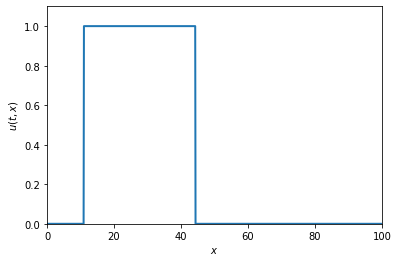

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Definition of the initial Gaussian profile
def Psi(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))

# Definition of the Top Hat profile
def TopHat(x):
    profile = np.zeros(len(x))
    for i in range(len(x)):
        if i<len(x)/3:
            profile[i] = 0
        elif i>=len(x)/3 and i<2*len(x)/3:
            profile[i] = 1
        else:
            profile[i] = 0
    return profile



# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 1.

# Definition of the grids
x_i = 0.
x_f = 100.
xlen = 1000
xgrid = np.linspace(x_i, x_f, xlen)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 5000.
dt = C*dx/v
tgrid = np.arange(t_i, t_f, dt)

print('dx =', dx)
print('C_{CFL} =', C)
print('dt =', dt)


#First Derivative
def minmod(a):
    dadx = np.zeros(xlen)
    # Boundary points
    dadx[0] = (a[1] - a[0])/(2*dx)
    dadx[-1] = (a[-1] - a[-2])/(2*dx)
    for i in range(1,xlen-1):
        derback = (a[i]-a[i-1])/dx
        derforw = (a[i+1]-a[i])/dx
        if derback*derforw >0:
            if np.abs(derback) < np.abs(derforw):
                dadx[i] = derback
            elif np.abs(derforw) < np.abs(derback):
                dadx[i] = derforw
            else:
                dadx[i] = 0
        else:
            dadx[i] = 0
            
    return dadx

# Flux Definition
def F(a):
    return v*a 

# Riemann Problem
def R(a,v):
    dadx = minmod(a)
    a_halftime = np.zeros(len(xgrid))
    if v>0:
        for i in range(len(xgrid)):
            a_halftime[i] = a[i] + (dx/2.)*(1.-(dt/dx)*v)*dadx[i]
    else:
        for i in range[1,len(xgrid)-2]:
            a_halftime[i] = a[i+1] - (dx/2.)*(1.+(dt/dx)*v)*dadx[i+1]
    return a_halftime

# Finite-Volume Method
def FV(a):
    anew = np.zeros(xlen) 
    Ra = R(a,v)
    Fa = F(Ra)
    for j in range(1,xlen):
        anew[j] = a[j] - (dt/dx)*(Fa[j] - Fa[j-1])
        
    # Periodic boundary conditions
    anew[0] = a[-1] 
    
    return anew

u_data = np.zeros([len(tgrid),xlen])
#u_data[0,:] = Psi(xgrid)
u_data[0,:] = TopHat(xgrid)

for i in range(1,len(tgrid)):
    u_data[i,:] = FV(u_data[i-1,:])


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((0, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = u_data[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 each
                               blit=True)

HTML(anim.to_jshtml())